In [1]:
#Importing dependencies: 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets


In [2]:
#Displaying  Data Frame: 
df = pd.read_csv('base_data.csv')
df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,201,Manual,Petrol,10.9,160500
1,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,150,Manual,Petrol,9.5,189500
2,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,179,Manual,Petrol,7.2,96127
3,5,alfa-romeo,Alfa Romeo Spider,red,04/1996,1996,7900,150,Manual,Petrol,9.5,47307
4,6,alfa-romeo,Alfa Romeo 145,red,12/1996,1996,3500,150,Manual,Petrol,8.8,230000


In [4]:
#Cleaning  Data Frame 
df_a5 = df.drop(['registration_date','price_in_euro','fuel_consumption_l_100km', 'mileage_in_km','power_ps','power_ps','Unnamed: 0','model','brand','color'], axis=1)

values_to_drop1 = ['Unknown']
df_all = df_a5[~df_a5['transmission_type'].isin(values_to_drop1)]
df_all.loc[:, 'year'] = df_all['year'].astype(str)

C:\Users\Aadhithya\AppData\Local\Temp\ipykernel_25056\3697015910.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all.loc[:, 'year'] = df_all['year'].astype(str)


In [6]:
group1 = df_all.groupby(['year','transmission_type'])['fuel_type'].count().unstack(fill_value=0)
group1.head()

transmission_type,Automatic,Manual,Semi-automatic
year,,,
1995,22,38,0
1996,44,84,1
1997,79,178,0
1998,106,258,1
1999,185,427,1


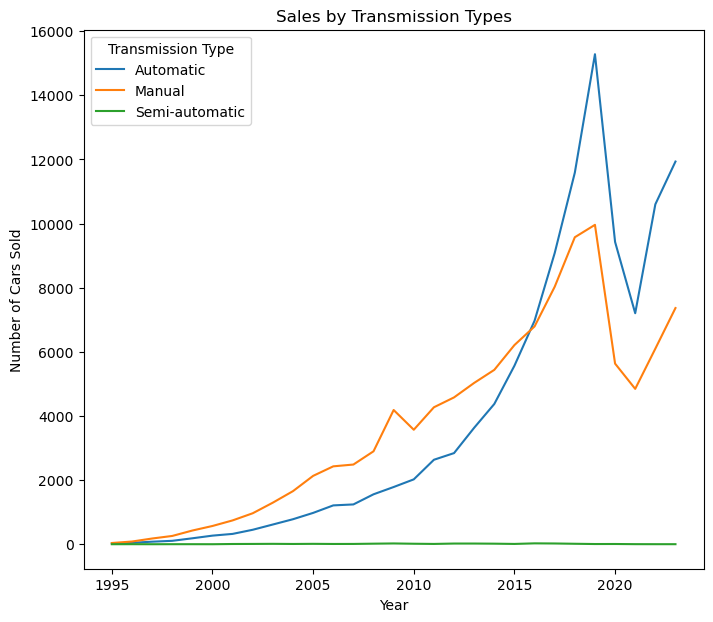

In [8]:
#Creating line graph showing Sales by Transmission Type: 

group1.plot(kind="line",legend=True,figsize=(8,7), label={'Automatic','Manual','Semi-Automatic'})
plt.legend(title="Transmission Type")
plt.title("Sales by Transmission Types")
plt.xlabel("Year")
plt.ylabel("Number of Cars Sold")
plt.savefig("Output_data/Line_chart_Sales_by_Transmission_All")

In [9]:
#Displaying 5-year Data Frame: 
df_5 = pd.read_csv('base_5_data.csv')
df_5.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
0,723,alfa-romeo,Alfa Romeo Stelvio,blue,08/2019,2019,41990,510,Automatic,Petrol,9.2,199000.0
1,724,alfa-romeo,Alfa Romeo Giulietta,blue,10/2019,2019,16995,120,Manual,Petrol,7.4,49700.0
2,725,alfa-romeo,Alfa Romeo Giulia,blue,02/2019,2019,30880,209,Automatic,Diesel,5.5,129357.0
3,726,alfa-romeo,Alfa Romeo Stelvio,blue,10/2019,2019,30890,190,Automatic,Diesel,6.1,82239.0
4,727,alfa-romeo,Alfa Romeo Stelvio,blue,05/2019,2019,68900,510,Unknown,Petrol,9.8,7000.0


In [10]:
#Cleaning 5-year Data Frame 
df_A5 = df_5.drop(['registration_date','price_in_euro','fuel_consumption_l_100km', 'mileage_in_km','power_ps','power_ps','Unnamed: 0','model','brand','color'], axis=1)

values_to_drop1 = ['Unknown']
df_AA5 = df_A5[~df_A5['transmission_type'].isin(values_to_drop1)]
df_AA5.loc[:, 'year'] = df_AA5['year'].astype(str)

C:\Users\Aadhithya\AppData\Local\Temp\ipykernel_25056\4103699384.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AA5.loc[:, 'year'] = df_AA5['year'].astype(str)


In [11]:
#Grouping Data Frame to extract the sales per Transmission Type in each year: 

group1 = df_AA5.groupby(['year','transmission_type'])['fuel_type'].count().unstack(fill_value=0)
group1

transmission_type,Automatic,Manual,Semi-automatic
year,,,
2019,15282,9961,6
2020,9428,5633,7
2021,7204,4845,2
2022,10601,6099,1
2023,11935,7366,1


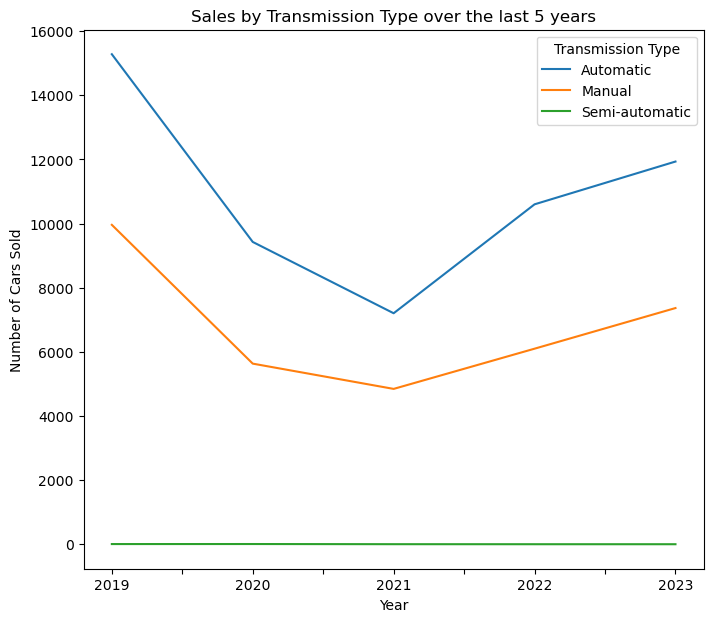

In [12]:
#Creating line graph showing Sales by Transmission Type over the last 5 years: 

group1.plot(kind="line",legend=True,figsize=(8,7), label={'Automatic','Manual','Semi-Automatic'})
plt.legend(title="Transmission Type")
plt.title("Sales by Transmission Type over the last 5 years")
plt.xlabel("Year")
plt.ylabel("Number of Cars Sold")
plt.savefig("Output_data/Line_chart_Sales_by_Transmission")